<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Semanal Nº10
#### Nicolás Salvia

# TS10: Filtrado digital lineal de ECG

Continuamos con el punto 4 del TP4. Realice los incisos c) y d).
- Diseñe al menos dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
- Evalúe el rendimiento de los filtros que haya diseñado:
    1. Verifique que filtra las señales interferentes
    2. Verifique que es inocuo en las zonas donde no hay interferentes

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal as scpySig
import pandas as pd

plt.rcParams['figure.figsize'] = [20, 10]

In [14]:
# Inicializamos las variables
mat = scipy.io.loadmat('TP4/ECG_TP4.mat')
ecg_lead = mat.get('ecg_lead')

N = ecg_lead.shape[0]
fs = 1000
fnyq = fs/2

In [15]:
# Creamos la plantilla
fs0 = 0.1  /fnyq
fc0 = 1  /fnyq
fc1 = 35 /fnyq
fs1 = 45 /fnyq
alfa_min = 30  #dB
alfa_max = 0.5 #db

wp = [fc0, fc1]
ws = [fs0, fs1]

In [16]:
# Diseñamos dos filtros IIR y dos filtros FIR

IIR_Butter = scpySig.iirdesign(wp, ws, alfa_max, alfa_min, analog=False, ftype='butter', output='sos')
IIR_Cheby = scpySig.iirdesign(wp, ws, alfa_max, alfa_min, analog=False, ftype='cheby1', output='sos')

FIR_Taps2001 = scpySig.firwin(2001, wp, pass_zero='bandpass', window='hann')
FIR_Taps101 = scpySig.firwin(101, wp, pass_zero='bandpass', window='hann')

In [17]:
# Calculamos las respuestas de los filtros
w1_IIR_Butter, h1_IIR_Butter = scpySig.sosfreqz(IIR_Butter, fs=fs, worN=2048)
w1_IIR_Cheby, h1_IIR_Cheby = scpySig.sosfreqz(IIR_Cheby, fs=fs, worN=2048)
w1_FIR_2001, h1_FIR_2001 = scpySig.freqz(FIR_Taps2001, fs=fs, worN=2048)
w1_FIR_101, h1_FIR_101 = scpySig.freqz(FIR_Taps101, fs=fs, worN=2048)

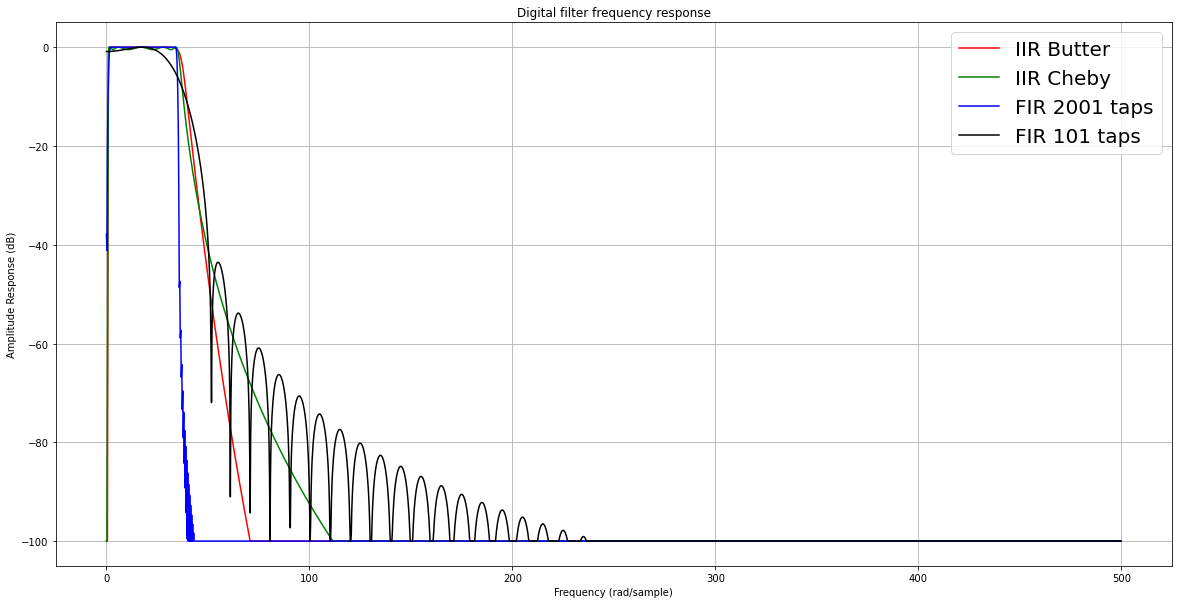

In [18]:
# Graficamos las respuestas
plt.figure(1)
plt.title('Digital filter frequency response')
plt.plot(w1_IIR_Butter, 20*np.log10(np.maximum(np.abs(h1_IIR_Butter), 1e-5)), 'r')
plt.plot(w1_IIR_Cheby, 20*np.log10(np.maximum(np.abs(h1_IIR_Cheby), 1e-5)), 'g')
plt.plot(w1_FIR_2001, 20*np.log10(np.maximum(np.abs(h1_FIR_2001), 1e-5)), 'b')
plt.plot(w1_FIR_101, 20*np.log10(np.maximum(np.abs(h1_FIR_101), 1e-5)), 'k')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (rad/sample)')
plt.legend(['IIR Butter', 'IIR Cheby', 'FIR 2001 taps', 'FIR 101 taps'], prop={"size": 20})
plt.grid()
plt.show();

In [19]:
# Definimos los intervalos de interes de la señal original
zonas_con_interf_baja_frec = ( 
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )


zonas_sin_interf = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )
zona_con_interf_orig1 = ecg_lead[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
zona_con_interf_orig2 = ecg_lead[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]
zona_sin_interf_orig1 = ecg_lead[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]
zona_sin_interf_orig2 = ecg_lead[int(zonas_sin_interf[1][0]):int(zonas_sin_interf[1][1])]
zona_sin_interf_orig3 = ecg_lead[int(zonas_sin_interf[2][0]):int(zonas_sin_interf[2][1])]

In [20]:
#Filtramos con el IIR Butter
filtered_ecg_butter = scpySig.sosfiltfilt(IIR_Butter, ecg_lead, axis=0)

#Obtenemos los intervalos de interes de la señal filtrada
zona_con_interf_IIRB1 = filtered_ecg_butter[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
zona_con_interf_IIRB2 = filtered_ecg_butter[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]
zona_sin_interf_IIRB1 = filtered_ecg_butter[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]
zona_sin_interf_IIRB2 = filtered_ecg_butter[int(zonas_sin_interf[1][0]):int(zonas_sin_interf[1][1])]
zona_sin_interf_IIRB3 = filtered_ecg_butter[int(zonas_sin_interf[2][0]):int(zonas_sin_interf[2][1])]

In [21]:
#Filtramos con el IIR Cheby
filtered_ecg_cheby = scpySig.sosfiltfilt(IIR_Cheby, ecg_lead, axis=0)

#Obtenemos los intervalos de interes de la señal filtrada
zona_con_interf_IIRC1 = filtered_ecg_cheby[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
zona_con_interf_IIRC2 = filtered_ecg_cheby[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]
zona_sin_interf_IIRC1 = filtered_ecg_cheby[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]
zona_sin_interf_IIRC2 = filtered_ecg_cheby[int(zonas_sin_interf[1][0]):int(zonas_sin_interf[1][1])]
zona_sin_interf_IIRC3 = filtered_ecg_cheby[int(zonas_sin_interf[2][0]):int(zonas_sin_interf[2][1])]

In [22]:
#Filtramos con el FIR 2001 taps
filtered_ecg_FIR2001 = scpySig.filtfilt(FIR_Taps2001, 1, ecg_lead, axis=0)

#Obtenemos los intervalos de interes de la señal filtrada
zona_con_interf_FIR20011 = filtered_ecg_FIR2001[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
zona_con_interf_FIR20012 = filtered_ecg_FIR2001[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]
zona_sin_interf_FIR20011 = filtered_ecg_FIR2001[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]
zona_sin_interf_FIR20012 = filtered_ecg_FIR2001[int(zonas_sin_interf[1][0]):int(zonas_sin_interf[1][1])]
zona_sin_interf_FIR20013 = filtered_ecg_FIR2001[int(zonas_sin_interf[2][0]):int(zonas_sin_interf[2][1])]

In [23]:
#Filtramos con el FIR 501 taps
filtered_ecg_FIR101 = scpySig.filtfilt(FIR_Taps101, 1, ecg_lead, axis=0)

#Obtenemos los intervalos de interes de la señal filtrada
zona_con_interf_FIR1011 = filtered_ecg_FIR101[int(zonas_con_interf_baja_frec[0][0]):int(zonas_con_interf_baja_frec[0][1])]
zona_con_interf_FIR1012 = filtered_ecg_FIR101[int(zonas_con_interf_baja_frec[1][0]):int(zonas_con_interf_baja_frec[1][1])]
zona_sin_interf_FIR1011 = filtered_ecg_FIR101[int(zonas_sin_interf[0][0]):int(zonas_sin_interf[0][1])]
zona_sin_interf_FIR1012 = filtered_ecg_FIR101[int(zonas_sin_interf[1][0]):int(zonas_sin_interf[1][1])]
zona_sin_interf_FIR1013 = filtered_ecg_FIR101[int(zonas_sin_interf[2][0]):int(zonas_sin_interf[2][1])]

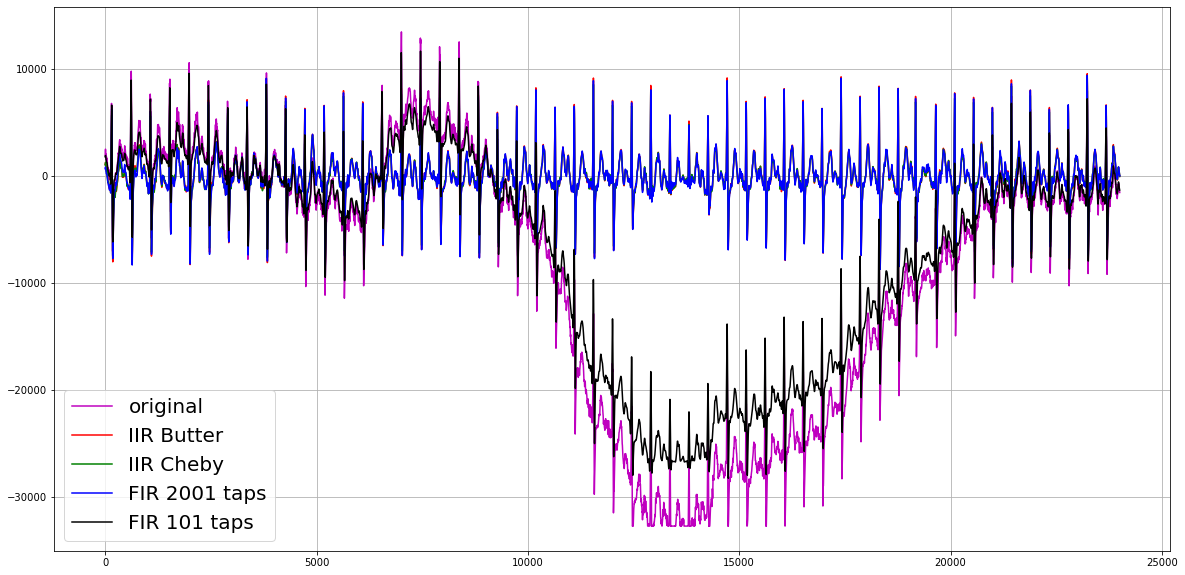

In [24]:
#Graficamos la primera zona
plt.plot(zona_con_interf_orig1, 'm')
plt.plot(zona_con_interf_IIRB1, 'r')
plt.plot(zona_con_interf_IIRC1, 'g')
plt.plot(zona_con_interf_FIR20011, 'b')
plt.plot(zona_con_interf_FIR1011, 'k')
plt.legend(['original','IIR Butter', 'IIR Cheby', 'FIR 2001 taps', 'FIR 101 taps'], prop={"size": 20})
plt.grid()
plt.show();

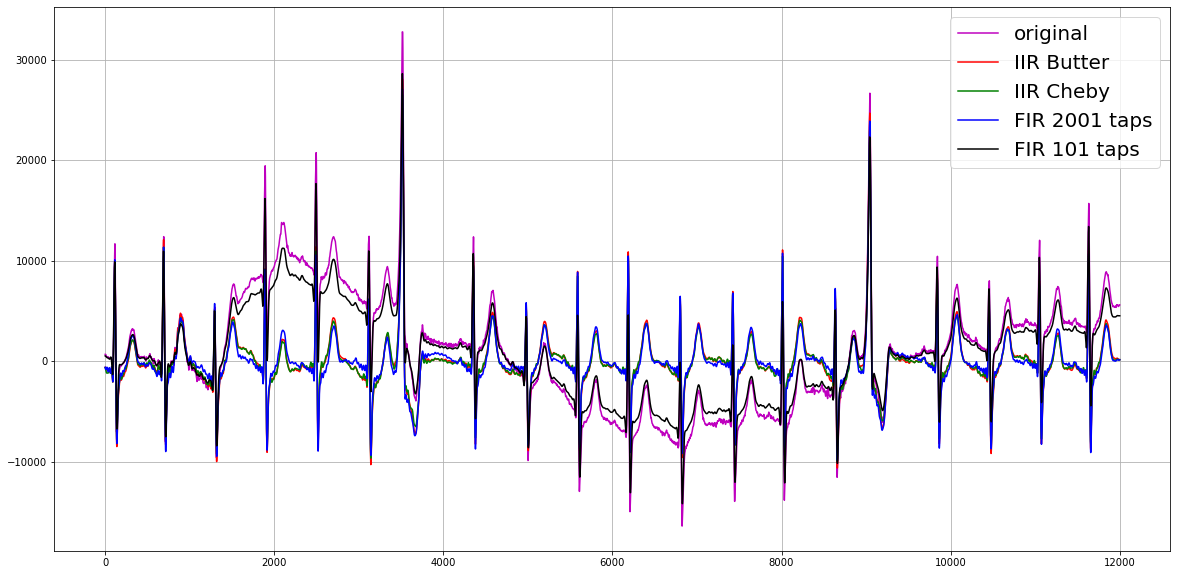

In [25]:
#Graficamos la segunda zona
plt.plot(zona_con_interf_orig2, 'm')
plt.plot(zona_con_interf_IIRB2, 'r')
plt.plot(zona_con_interf_IIRC2, 'g')
plt.plot(zona_con_interf_FIR20012, 'b')
plt.plot(zona_con_interf_FIR1012, 'k')
plt.legend(['original','IIR Butter', 'IIR Cheby', 'FIR 2001 taps', 'FIR 101 taps'], prop={"size": 20})
plt.grid()
plt.show();

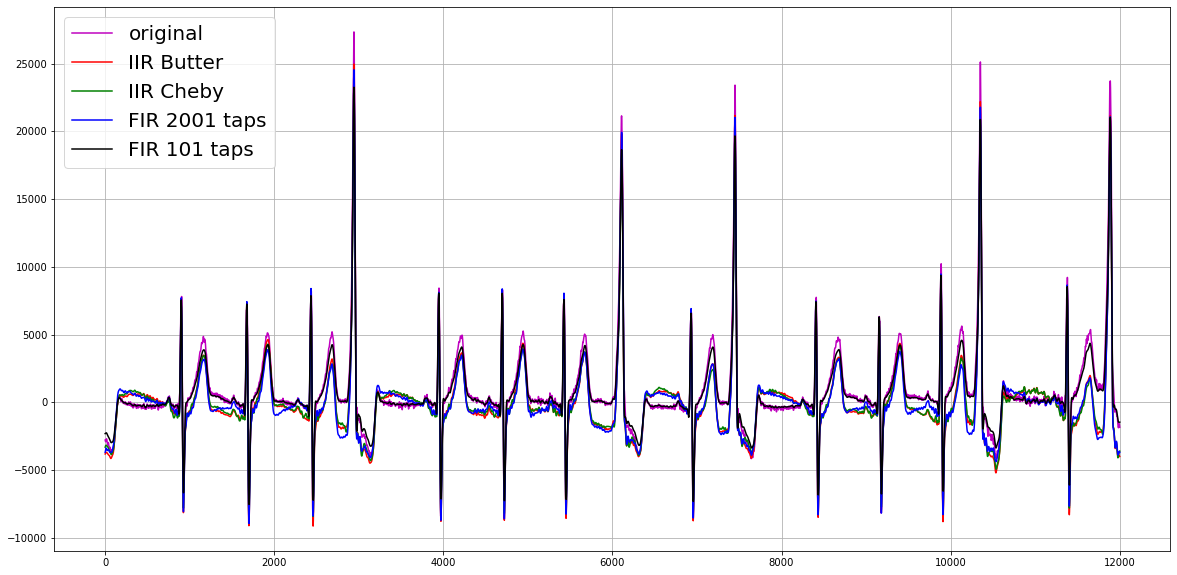

In [26]:
#Graficamos la tercera zona
plt.plot(zona_sin_interf_orig1, 'm')
plt.plot(zona_sin_interf_IIRB1, 'r')
plt.plot(zona_sin_interf_IIRC1, 'g')
plt.plot(zona_sin_interf_FIR20011, 'b')
plt.plot(zona_sin_interf_FIR1011, 'k')
plt.legend(['original','IIR Butter', 'IIR Cheby', 'FIR 2001 taps', 'FIR 101 taps'], prop={"size": 20})
plt.grid()
plt.show();

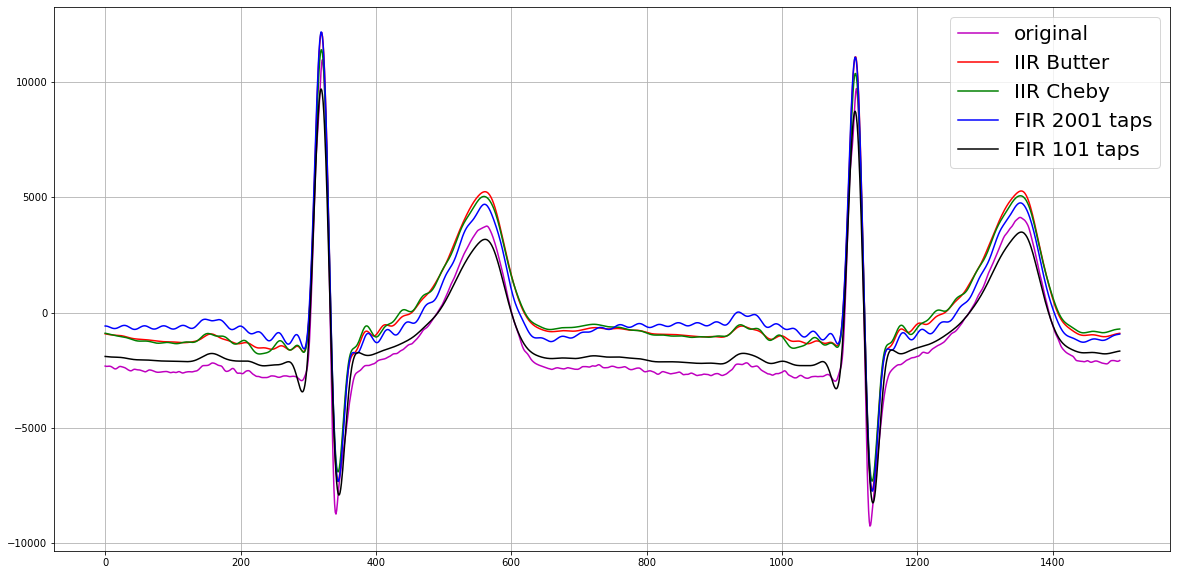

In [27]:
#Graficamos la cuarta zona
plt.plot(zona_sin_interf_orig2, 'm')
plt.plot(zona_sin_interf_IIRB2, 'r')
plt.plot(zona_sin_interf_IIRC2, 'g')
plt.plot(zona_sin_interf_FIR20012, 'b')
plt.plot(zona_sin_interf_FIR1012, 'k')
plt.legend(['original','IIR Butter', 'IIR Cheby', 'FIR 2001 taps', 'FIR 101 taps'], prop={"size": 20})
plt.grid()
plt.show();

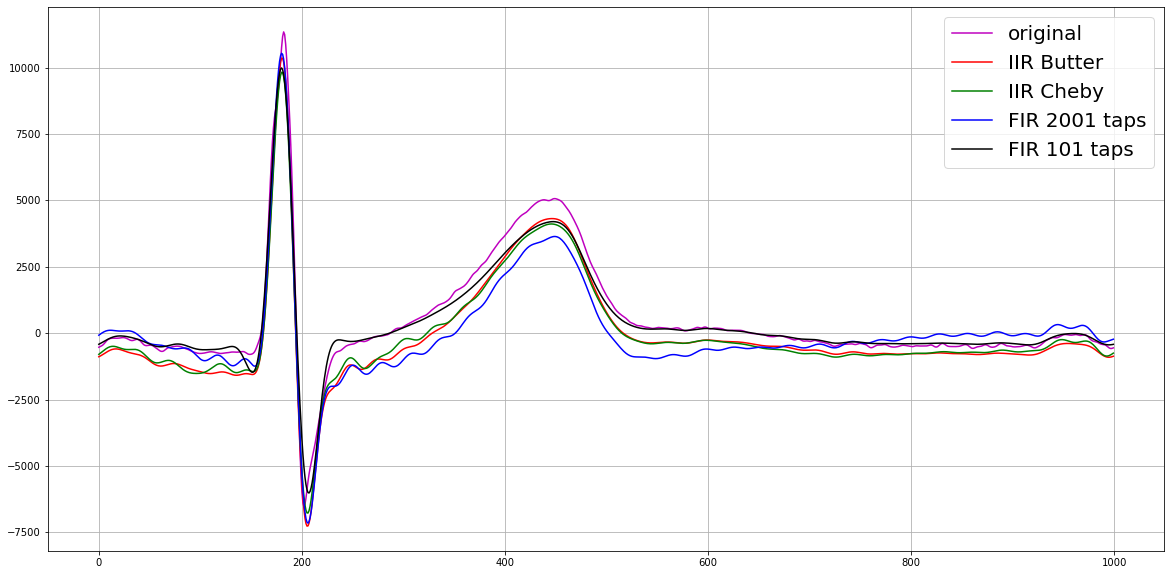

In [28]:
#Graficamos la quinta zona
plt.plot(zona_sin_interf_orig3, 'm')
plt.plot(zona_sin_interf_IIRB3, 'r')
plt.plot(zona_sin_interf_IIRC3, 'g')
plt.plot(zona_sin_interf_FIR20013, 'b')
plt.plot(zona_sin_interf_FIR1013, 'k')
plt.legend(['original','IIR Butter', 'IIR Cheby', 'FIR 2001 taps', 'FIR 101 taps'], prop={"size": 20})
plt.grid()
plt.show();

Puede observarse que los 3 filtros con excepción del filtro FIR de 101 taps, pudieron filtrar la señal correctamente, eliminando las oscilaciones a baja frecuencia presentes en la señal original.
A partir de los filtros obtenidos, podemos hallar los ordenes correspondientes de cada uno

In [29]:
print("Orden filtro IIR Butter: ", len(IIR_Butter)*len(IIR_Butter[1]))
print("Orden filtro IIR Cheby: ", len(IIR_Cheby)*len(IIR_Cheby[1]))
print("Orden filtro FIR 2001 Taps: ", len(FIR_Taps2001) - 1)
print("Orden filtro FIR 101 Taps: ", len(FIR_Taps101) - 1)

Orden filtro IIR Butter:  102
Orden filtro IIR Cheby:  42
Orden filtro FIR 2001 Taps:  2000
Orden filtro FIR 101 Taps:  100


Como se puede observar, los filtros FIR requieren de un mayor orden que los IIR para poder cumplir con la plantilla diseñada